## Pacotes

In [225]:
library(dplyr)
library(ggplot2)
library(plyr)
library(cowplot)
library(scales)

In [3]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
5,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
6,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [4]:
df = data[data$CO_GRUPO == 13,]

In [6]:
dim(df)

[1] 9582  137

## Criando uma variável Dummy para UFPR IES 571
* Número de verificações = 114

In [7]:
df$ufpr = as.factor(ifelse(df$CO_IES == 571,1,0))

In [45]:
table(df$ufpr)


   0    1 
9468  114 

In [9]:
df_1 = df %>% 
        select(NT_GER, ufpr, TP_SEXO, NU_IDADE,QE_I02, QE_I08, QE_I21, QE_I10,QE_I23) %>% 
        setNames(c("nota", "ufpr", "genero", "idade","cor", "renda", "escolaridade_pais","trabalho", "esforco"))

In [10]:
head(df_1)

,nota,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco
,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
161,24.9,0,F,28,A,C,B,E,C
162,25.6,0,M,30,A,D,A,E,B
163,48.7,0,M,29,A,C,B,E,C
164,35.7,0,F,22,A,B,A,E,B
165,33.9,0,M,47,A,B,A,E,C
166,23.5,0,M,27,A,C,B,E,C


In [14]:
df_1$cor = mapvalues(df_1$cor, from=c("A","B","C","D","E","F"), to=c("branca","preta","amarela","parda","indigina","não declarado"))
df_1$renda = mapvalues(df_1$renda, from=c("A","B","C","D","E","F","G"), to=c("Até 1.5 salário mínimo","De 1.5 a 3 salários mínimos",
                                                                "De 3 a 4.5 salários mínimos","De 4.5 a 6 salários mínimos","De 6 a 10 salários mínimos",
                                                                                "10 a 30 salários mínimos", "Acima de 30 salários mínimos"))
df_1$escolaridade_pais = mapvalues(df_1$escolaridade_pais, from=c("A","B"), to=c("sim","não"))
df_1$trabalho = mapvalues(df_1$trabalho, from=c("A","B","C","D","E"), to=c("Não trabalha",
                                                                  "Trabalha eventualmente",
                                                                 "Trabalha até 20 hrs. semanais",
                                                                 "Trabalha de 21 a 39 hrs. semanais",
                                                                 "Trabalha 40 hrs. semanais ou mais"))
df_1$esforco = mapvalues(df_1$esforco, from=c("A","B","C","D","E"), to=c("Nenhuma, apenas assistindo as aulas","De uma a três",
                                                                "De quatro a sete","De oito adoze","Mais de doze"))

In [15]:
head(df_1)

,nota,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco
,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
161,24.9,0,F,28,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete
162,25.6,0,M,30,branca,De 4.5 a 6 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De uma a três
163,48.7,0,M,29,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete
164,35.7,0,F,22,branca,De 1.5 a 3 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De uma a três
165,33.9,0,M,47,branca,De 1.5 a 3 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De quatro a sete
166,23.5,0,M,27,branca,De 3 a 4.5 salários mínimos,não,Trabalha 40 hrs. semanais ou mais,De quatro a sete


In [159]:
df_ufpr = df_1[df_1$ufpr==1,]

## Dados altantes em UFPR

In [181]:
# Nas notas gerais havia alunos que não preencheram, porém obteram nota. Na ufpr os alunos que não preencheram também não obteram nota. Por isso, estava criando uma categoria sem nota. 

In [160]:
sapply(df_ufpr, function(x) sum(is.na(x)))

nota              ufpr            genero             idade 
               17                 0                 0                 0 
              cor             renda escolaridade_pais          trabalho 
                0                 0                 0                 0 
          esforco 
                0

In [228]:
sapply(df_1, function(x) sum(is.na(x)))

nota              ufpr            genero             idade 
             1509                 0                 0                 0 
              cor             renda escolaridade_pais          trabalho 
                0                 0                 0                 0 
          esforco 
                0

In [148]:
df_ufpr[is.na(df_ufpr),]

,nota,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco
,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
177745,NA,1,M,35,branca,Até 1.5 salário mínimo,sim,Não trabalha,"Nenhuma, apenas assistindo as aulas"
178029,NA,1,M,26,,,,,
178030,NA,1,M,30,,,,,
178031,NA,1,M,27,branca,De 1.5 a 3 salários mínimos,sim,Não trabalha,De quatro a sete
178036,NA,1,F,29,,,,,
178038,NA,1,F,29,branca,Até 1.5 salário mínimo,sim,Não trabalha,Mais de doze
178048,NA,1,F,26,branca,10 a 30 salários mínimos,sim,Não trabalha,De uma a três
178053,NA,1,M,25,branca,Até 1.5 salário mínimo,sim,Não trabalha,De quatro a sete
178054,NA,1,M,29,parda,Acima de 30 salários mínimos,sim,Trabalha 40 hrs. semanais ou mais,De uma a três


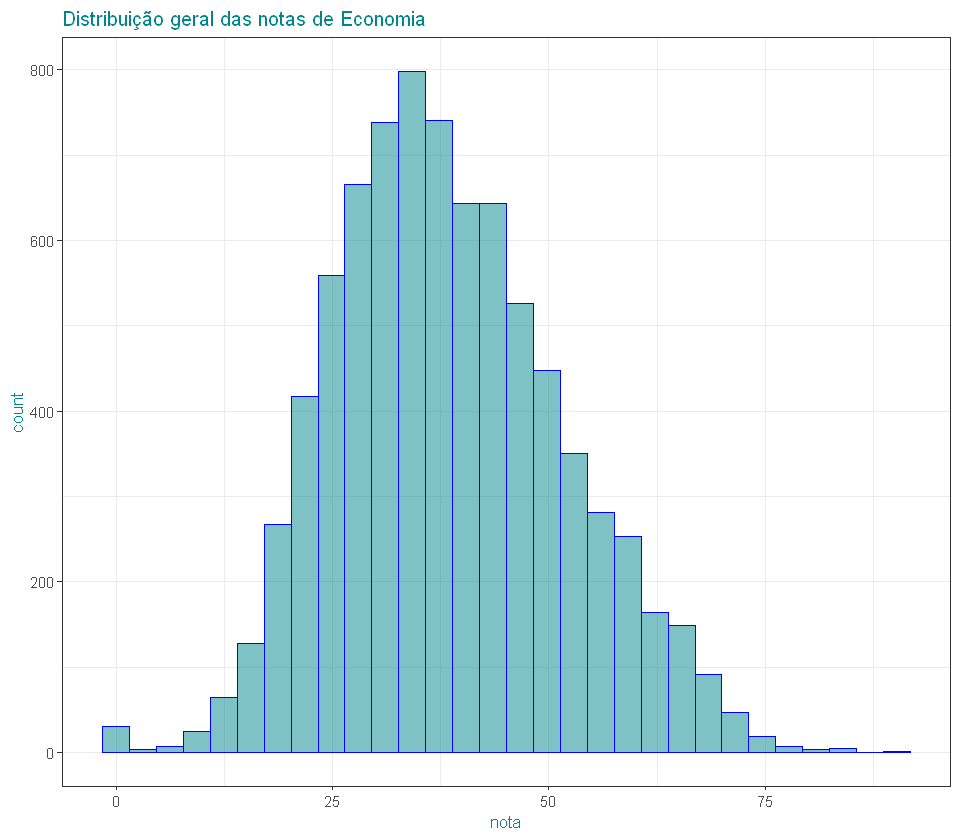

In [151]:
ggplot(df_1, aes(x=nota)) +
    geom_histogram(alpha=0.5, bins = 30, fill="turquoise4", color='blue',na.rm = TRUE)+
    ggtitle("Distribuição geral das notas de Economia")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))

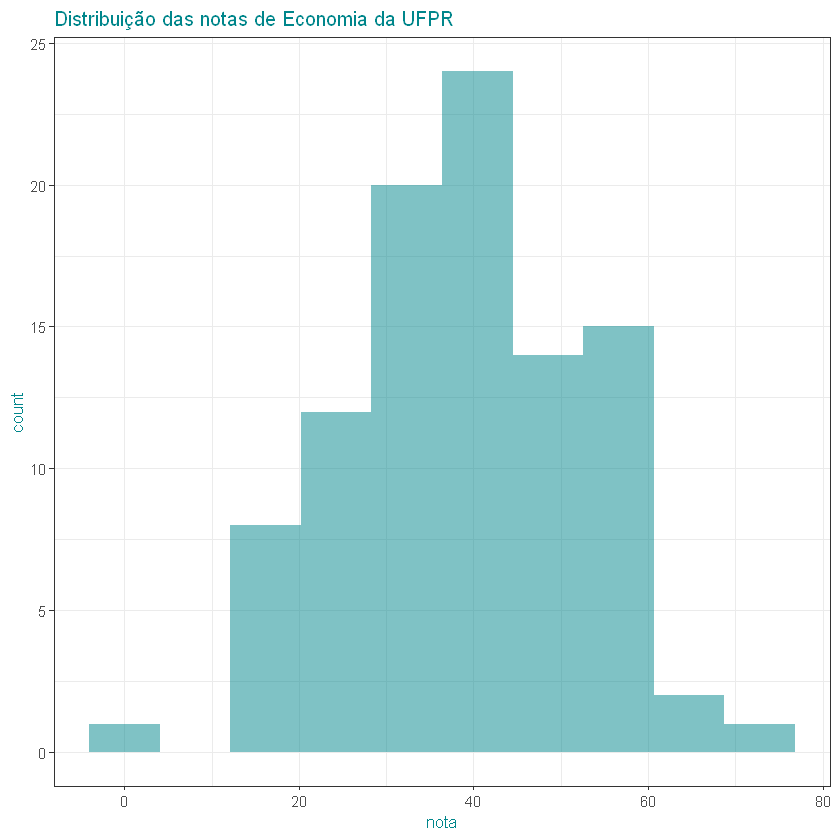

In [19]:
ggplot(df_ufpr, aes(x=nota)) +
    geom_histogram(alpha=0.5, bins = 10, fill="turquoise4", na.rm = TRUE)+
    ggtitle("Distribuição das notas de Economia da UFPR")+
    theme_bw()+
    theme(title=element_text(size=10,color="turquoise4"))

## A média das notas da Ufpr são levemente maiores

In [22]:
# Mediadas
print('Geral')
summary(df_1$nota)
print('Ufpr')
summary(df_ufpr$nota)

[1] "Geral"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    28.9    37.2    38.4    47.0    90.2    1509 

[1] "Ufpr"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   30.90   38.80   38.81   49.50   72.80      17 

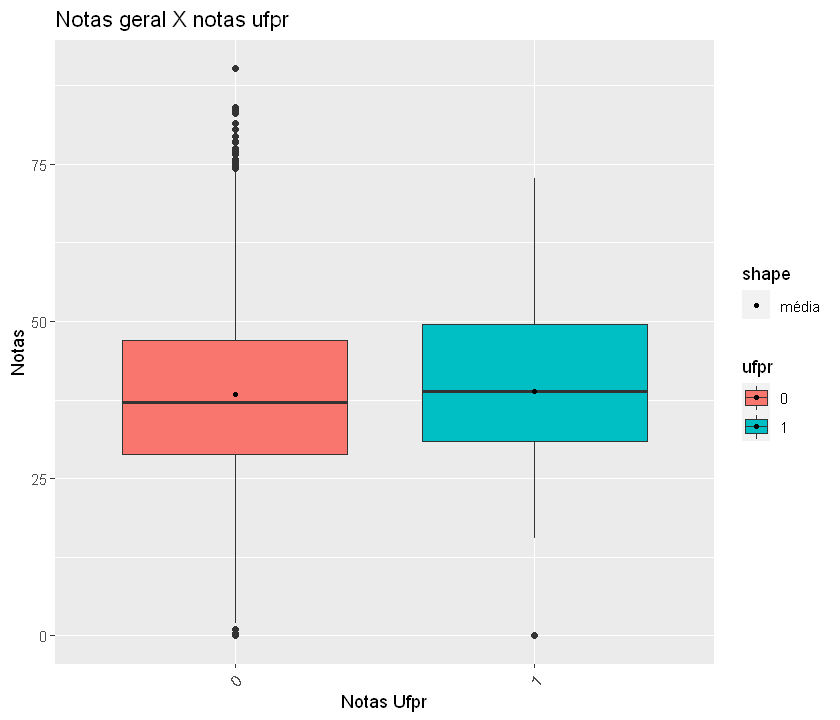

In [154]:
options(repr.plot.width = 7, repr.plot.height = 6)
ggplot(df_1, aes(x=ufpr, y=nota, fill=ufpr)) +
    geom_boxplot(na.rm = TRUE) +
    stat_summary(aes(shape = "média"),
               geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
    ggtitle("Notas geral X notas ufpr")+
    xlab("Notas Ufpr")+
    ylab("Notas")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));

# Notas por Cor/Raça

In [166]:
print('Geral')
prop.table(table(df_1$cor))
print('Ufpr')
prop.table(table(df_ufpr$cor))

[1] "Geral"



                     branca         preta       amarela         parda 
  0.113441870   0.541327489   0.068357337   0.020768107   0.234293467 
     indigina não declarado 
  0.001982885   0.019828846 

[1] "Ufpr"



                     branca         preta       amarela         parda 
   0.05263158    0.78070175    0.01754386    0.04385965    0.08771930 
     indigina não declarado 
   0.00000000    0.01754386 

In [167]:
print('Geral')
tapply(df_1$nota, df_1$cor, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$cor, FUN=mean, na.rm=T)

[1] "Geral"


branca         preta       amarela         parda 
     34.51633      39.42895      35.63851      38.33656      36.81624 
     indigina não declarado 
     31.58421      40.40621

[1] "Ufpr"


branca         preta       amarela         parda 
          NaN      37.90506      38.70000      39.38000      48.58889 
     indigina não declarado 
           NA      29.05000

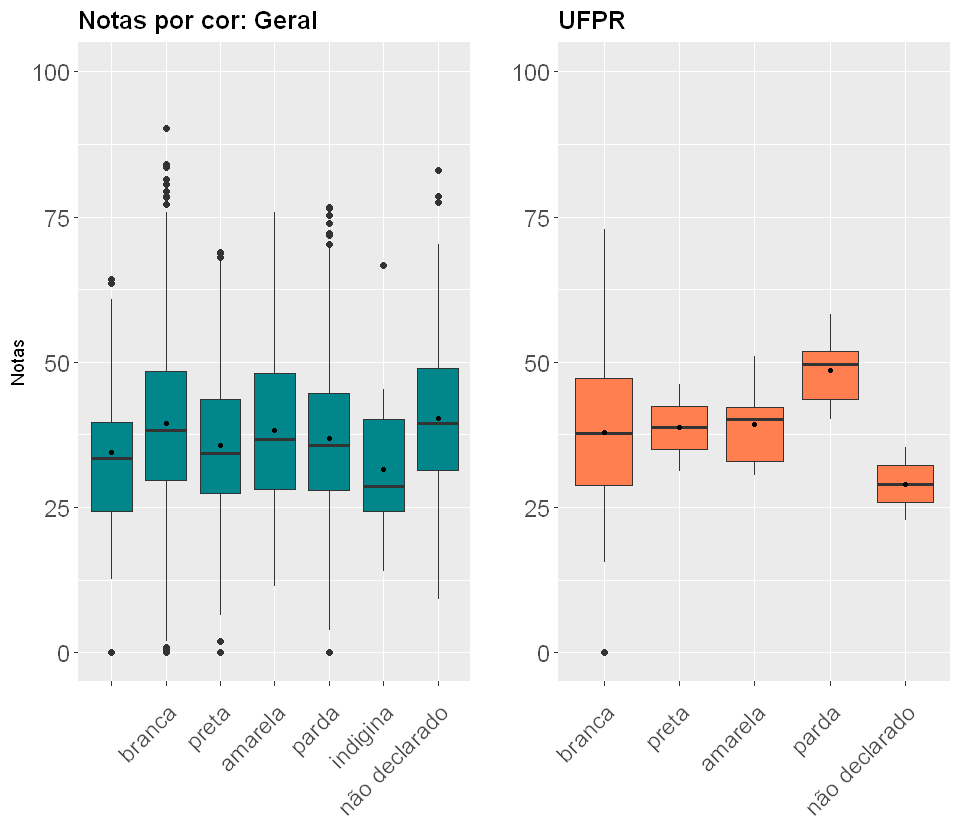

In [182]:
options(repr.plot.width = 8, repr.plot.height = 7)
b1 = ggplot(df_1, aes(x=cor, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        ggtitle("Notas por cor: Geral")+ 
        ylab("Notas")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14), 
             plot.title = element_text(size=15, face="bold"));
b2 = ggplot(data=subset(df_ufpr,!is.na(nota)), aes(x=cor, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+  
        ggtitle("UFPR")+ 
        ylab("")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14),
             plot.title = element_text(size=15, face="bold"));
plot_grid(b1, b2)

# Notas por Gênero

In [168]:
print('Geral')
prop.table(table(df_1$genero))
print('Ufpr')
prop.table(table(df_ufpr$genero))

[1] "Geral"



        F         M 
0.3956377 0.6043623 

[1] "Ufpr"



        F         M 
0.3333333 0.6666667 

In [171]:
print('Geral')
tapply(df_1$nota, df_1$genero, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$genero, FUN=mean, na.rm=T)

[1] "Geral"


F        M 
34.92807 40.79487

[1] "Ufpr"


F        M 
37.83125 39.28615

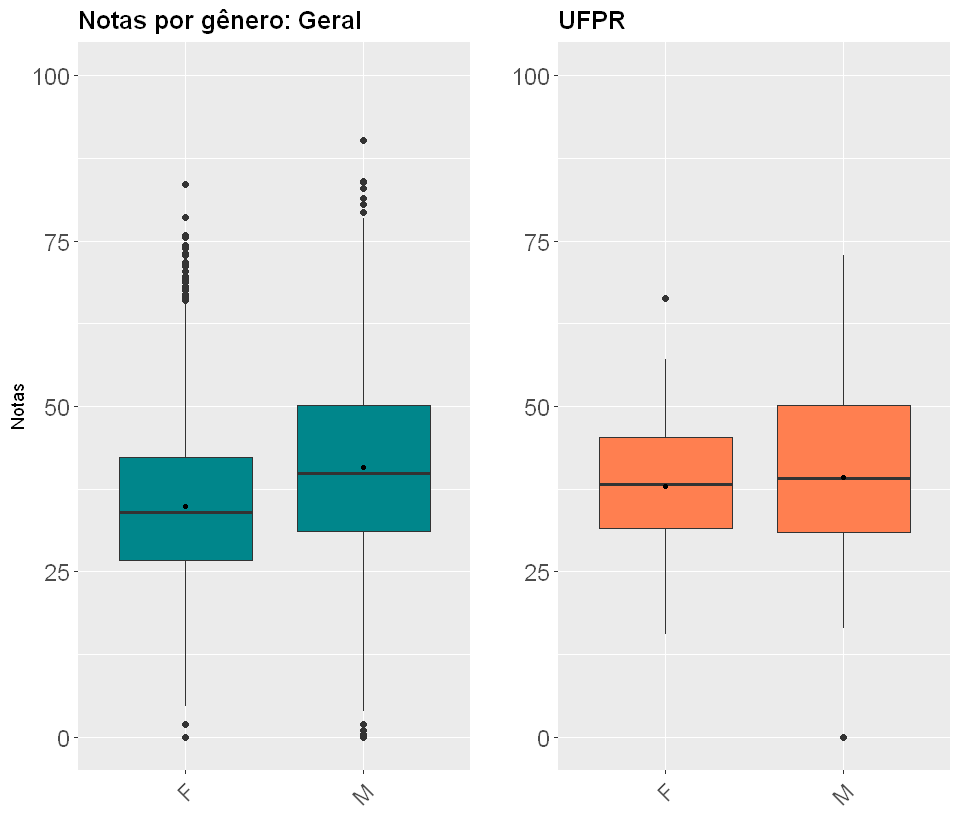

In [183]:
options(repr.plot.width = 8, repr.plot.height = 7)
b1 = ggplot(df_1, aes(x=genero, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        ggtitle("Notas por gênero: Geral")+ 
        ylab("Notas")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14), 
             plot.title = element_text(size=15, face="bold"));
b2 = ggplot(data=subset(df_ufpr,!is.na(nota)), aes(x=genero, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+  
        ggtitle("UFPR")+ 
        ylab("")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14),
             plot.title = element_text(size=15, face="bold"));
plot_grid(b1, b2)

# Notas por Renda

In [177]:
print('Geral')
prop.table(table(df_1$renda))
print('Ufpr')
prop.table(table(df_ufpr$renda))

[1] "Geral"



                                   Até 1.5 salário mínimo 
                  0.11344187                   0.13420998 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                  0.16301398                   0.15737842 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                  0.10363181                   0.13963682 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                  0.13661031                   0.05207681 

[1] "Ufpr"



                                   Até 1.5 salário mínimo 
                  0.05263158                   0.34210526 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                  0.08771930                   0.09649123 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                  0.09649123                   0.16666667 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                  0.13157895                   0.02631579 

In [178]:
print('Geral')
tapply(df_1$nota, df_1$renda, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$renda, FUN=mean, na.rm=T)

[1] "Geral"


Até 1.5 salário mínimo 
                    34.51633                     34.41064 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                    35.29743                     36.29457 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                    38.04718                     40.28169 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                    44.10796                     45.88846

[1] "Ufpr"


Até 1.5 salário mínimo 
                         NaN                     35.63437 
 De 1.5 a 3 salários mínimos  De 3 a 4.5 salários mínimos 
                    37.84444                     43.39091 
 De 4.5 a 6 salários mínimos   De 6 a 10 salários mínimos 
                    38.78182                     39.48889 
    10 a 30 salários mínimos Acima de 30 salários mínimos 
                    42.59286                     36.15000

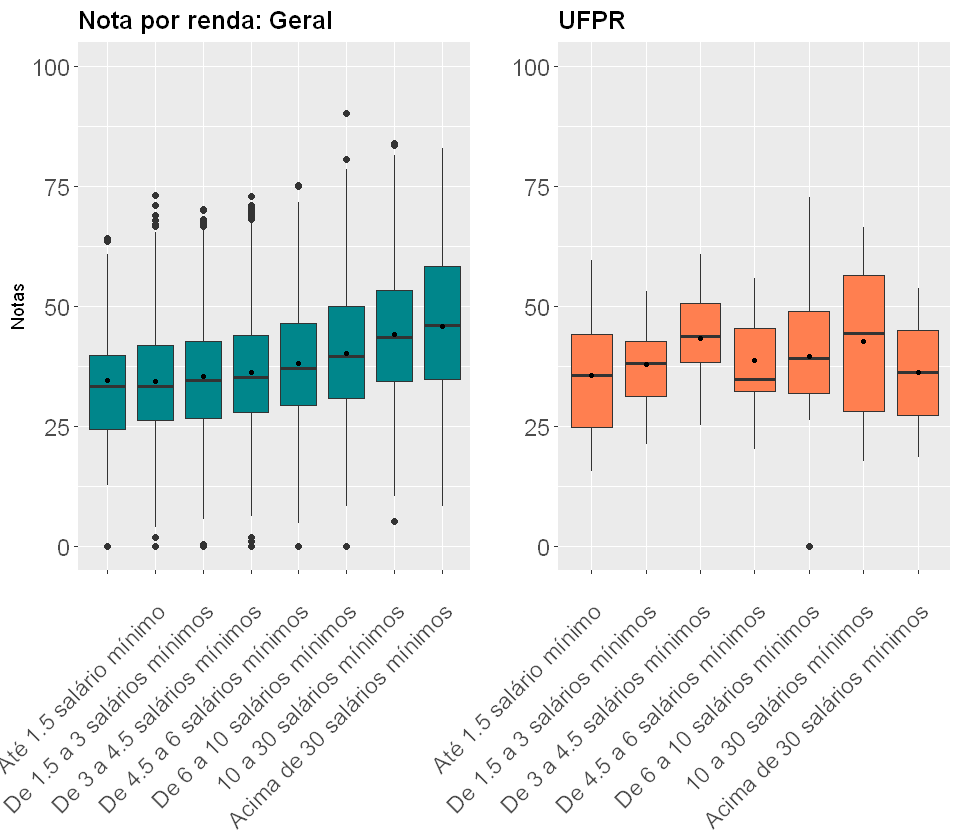

In [180]:
options(repr.plot.width = 8, repr.plot.height = 7)
b1 = ggplot(df_1, aes(x=renda, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        ggtitle("Nota por renda: Geral")+ 
        ylab("Notas")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14), 
             plot.title = element_text(size=15, face="bold"));
b2 = ggplot(data=subset(df_ufpr,!is.na(nota)), aes(x=renda, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+  
        ggtitle("UFPR")+ 
        ylab("")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14),
             plot.title = element_text(size=15, face="bold"));
plot_grid(b1, b2)

# Notas por escolaridade dos pais

In [184]:
print('Geral')
prop.table(table(df_1$escolaridade_pais))
print('Ufpr')
prop.table(table(df_ufpr$escolaridade_pais))

[1] "Geral"



                sim       não 
0.1134419 0.6793989 0.2071593 

[1] "Ufpr"



                  sim        não 
0.05263158 0.82456140 0.12280702 

In [185]:
print('Geral')
tapply(df_1$nota, df_1$escolaridade_pais, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$escolaridade_pais, FUN=mean, na.rm=T)

[1] "Geral"


sim      não 
34.51633 39.35790 35.40174

[1] "Ufpr"


sim      não 
     NaN 39.12771 36.90000

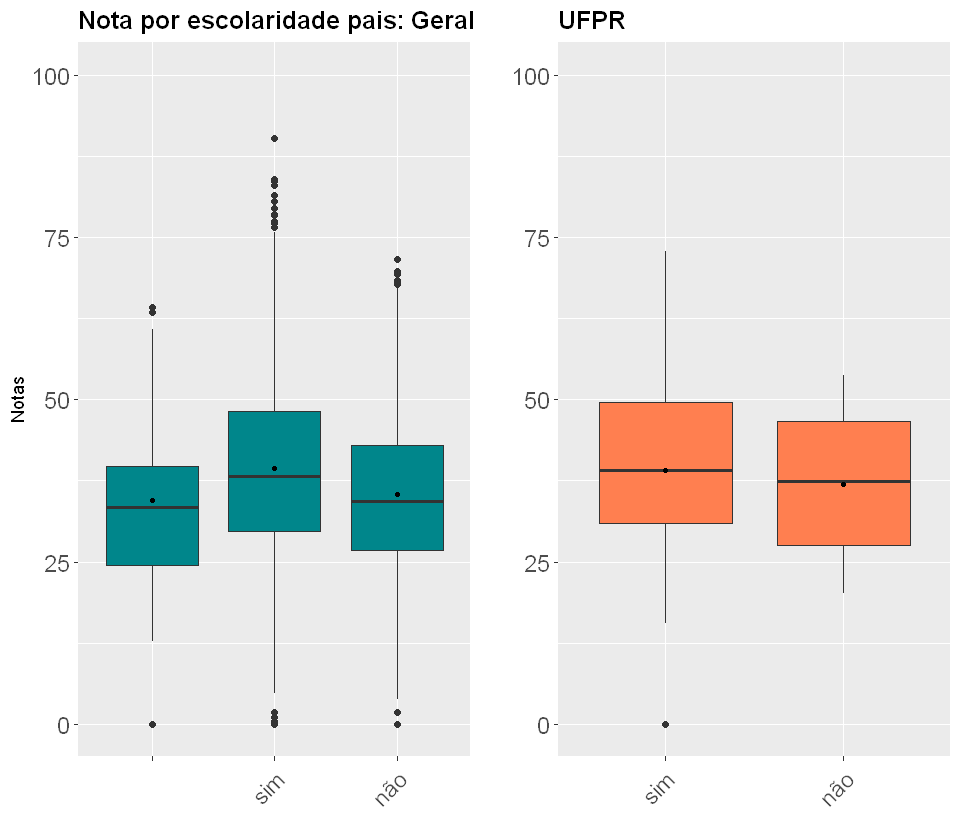

In [186]:
options(repr.plot.width = 8, repr.plot.height = 7)
b1 = ggplot(df_1, aes(x=escolaridade_pais, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        ggtitle("Nota por escolaridade pais: Geral")+ 
        ylab("Notas")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14), 
             plot.title = element_text(size=15, face="bold"));
b2 = ggplot(data=subset(df_ufpr,!is.na(nota)), aes(x=escolaridade_pais, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+  
        ggtitle("UFPR")+ 
        ylab("")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14),
             plot.title = element_text(size=15, face="bold"));
plot_grid(b1, b2)

# Notas por trabalho
---

In [187]:
print('Geral')
prop.table(table(df_1$trabalho))
print('Ufpr')
prop.table(table(df_ufpr$trabalho))

[1] "Geral"



                                                       Não trabalha 
                       0.11344187                        0.35170111 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                       0.03934460                        0.03871843 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                       0.12888750                        0.32790649 

[1] "Ufpr"



                                                       Não trabalha 
                       0.05263158                        0.53508772 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                       0.04385965                        0.00000000 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                       0.10526316                        0.26315789 

In [188]:
print('Geral')
tapply(df_1$nota, df_1$trabalho, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$trabalho, FUN=mean, na.rm=T)

[1] "Geral"


Não trabalha 
                         34.51633                          40.34725 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                         38.99009                          38.58397 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                         38.46692                          36.22492

[1] "Ufpr"


Não trabalha 
                              NaN                          39.19038 
           Trabalha eventualmente     Trabalha até 20 hrs. semanais 
                         42.12000                                NA 
Trabalha de 21 a 39 hrs. semanais Trabalha 40 hrs. semanais ou mais 
                         38.22500                          37.75000

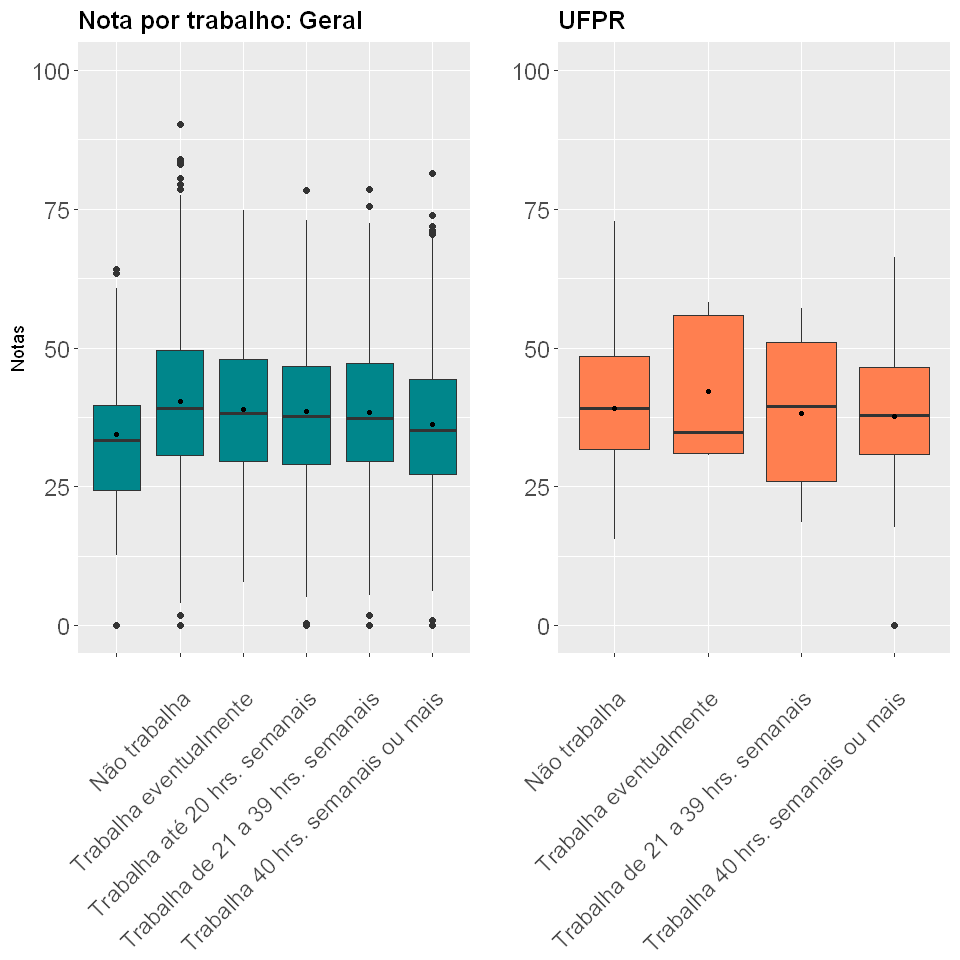

In [192]:
options(repr.plot.width = 8, repr.plot.height = 8)
b1 = ggplot(df_1, aes(x=trabalho, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        ggtitle("Nota por trabalho: Geral")+ 
        ylab("Notas")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14), 
             plot.title = element_text(size=15, face="bold"));
b2 = ggplot(data=subset(df_ufpr,!is.na(nota)), aes(x=trabalho, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+  
        ggtitle("UFPR")+ 
        ylab("")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14),
             plot.title = element_text(size=15, face="bold"));
plot_grid(b1, b2)

# Notas por esforço
---

In [193]:
print('Geral')
prop.table(table(df_1$esforco))
print('Ufpr')
prop.table(table(df_ufpr$esforco))

[1] "Geral"



                                    Nenhuma, apenas assistindo as aulas 
                         0.11344187                          0.08035901 
                      De uma a três                    De quatro a sete 
                         0.34554373                          0.27134210 
                      De oito adoze                        Mais de doze 
                         0.10321436                          0.08609894 

[1] "Ufpr"



                                    Nenhuma, apenas assistindo as aulas 
                         0.05263158                          0.33333333 
                      De uma a três                    De quatro a sete 
                         0.35087719                          0.12280702 
                      De oito adoze                        Mais de doze 
                         0.07017544                          0.07017544 

In [194]:
print('Geral')
tapply(df_1$nota, df_1$esforco, FUN=mean, na.rm=T)
print('Ufpr')
tapply(df_ufpr$nota, df_ufpr$esforco, FUN=mean, na.rm=T)

[1] "Geral"


Nenhuma, apenas assistindo as aulas 
                           34.51633                            36.80503 
                      De uma a três                    De quatro a sete 
                           36.63784                            38.65646 
                      De oito adoze                        Mais de doze 
                           41.17359                            42.91801

[1] "Ufpr"


Nenhuma, apenas assistindo as aulas 
                                NaN                            33.63636 
                      De uma a três                    De quatro a sete 
                           39.78378                            43.23333 
                      De oito adoze                        Mais de doze 
                           42.61250                            46.07143

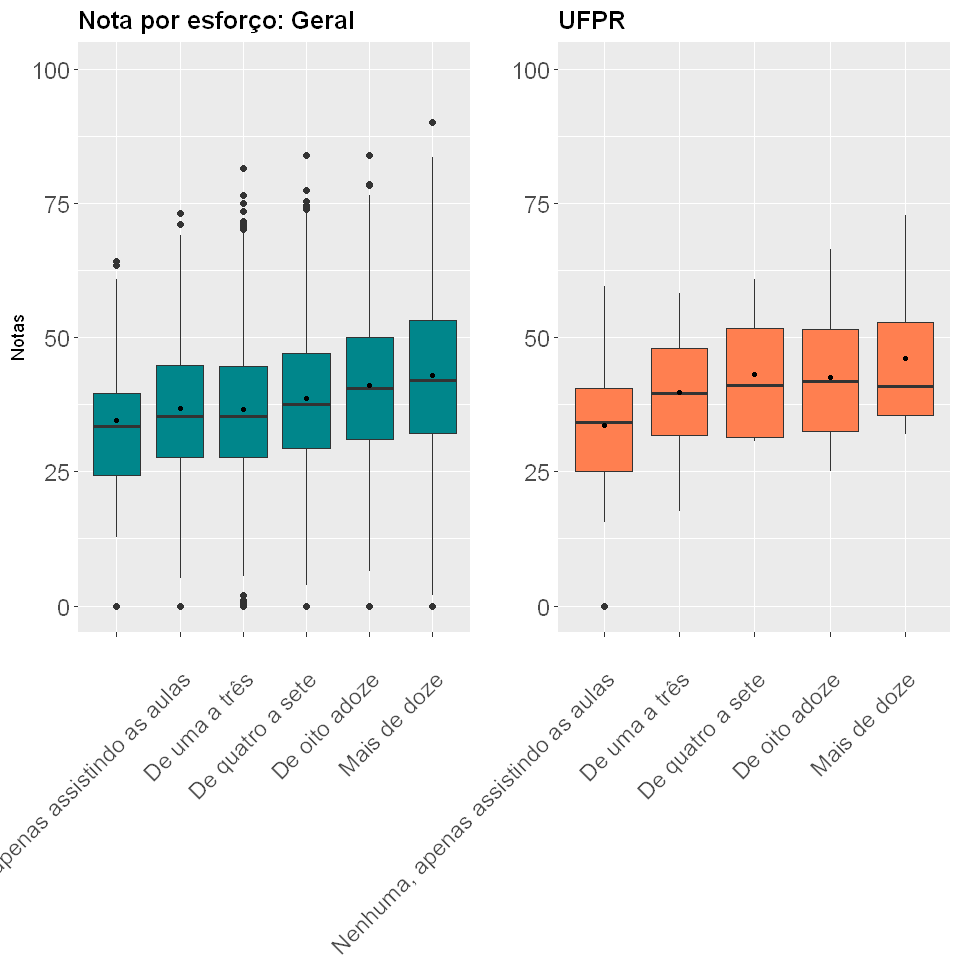

In [195]:
options(repr.plot.width = 8, repr.plot.height = 8)
b1 = ggplot(df_1, aes(x=esforco, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="turquoise4") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+
        ggtitle("Nota por esforço: Geral")+ 
        ylab("Notas")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14), 
             plot.title = element_text(size=15, face="bold"));
b2 = ggplot(data=subset(df_ufpr,!is.na(nota)), aes(x=esforco, y=nota)) +
        geom_boxplot(na.rm = TRUE, fill="coral") +
        scale_y_continuous(limits = c(0, 100))+
        stat_summary(geom = "point",
               fun = mean,
               size = 1,
               na.rm = TRUE)+  
        ggtitle("UFPR")+ 
        ylab("")+
        xlab("")+
        theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
             axis.text = element_text(size = 14),
             plot.title = element_text(size=15, face="bold"));
plot_grid(b1, b2)

Warning message:
"Removed 1509 rows containing missing values (position_stack)."


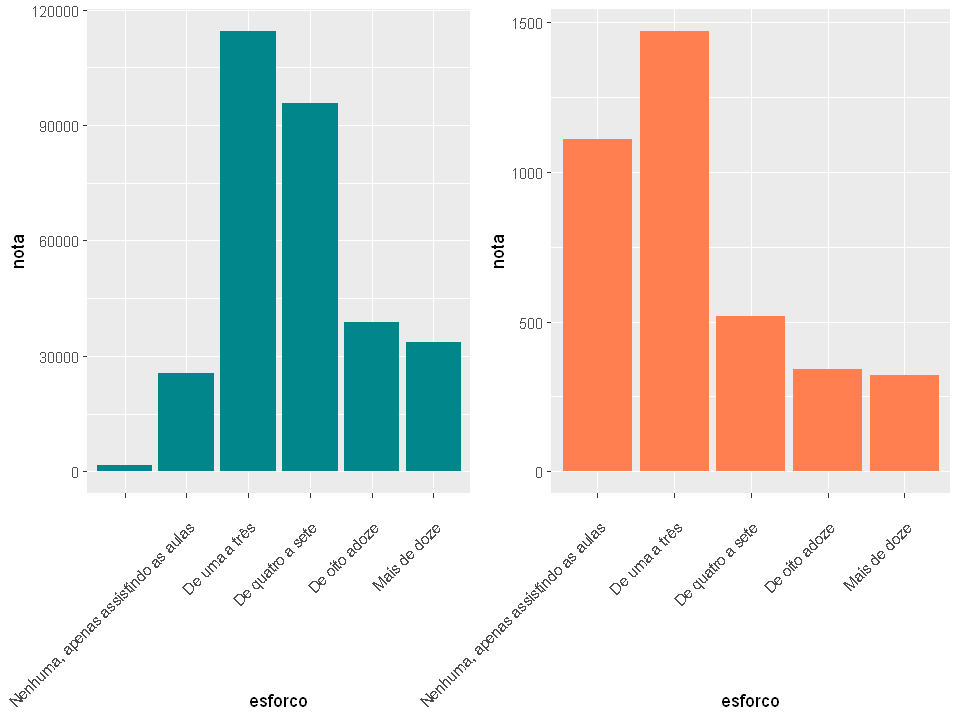

In [227]:
options(repr.plot.width = 8, repr.plot.height = 6)
b1 = ggplot(df_1, aes(y = nota, x = esforco)) +
  geom_bar(fill="turquoise4", stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
b2 = ggplot(data=subset(df_ufpr,!is.na(nota)), aes(y = nota, x = esforco)) +
  geom_bar(fill="coral", stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1));
plot_grid(b1, b2)

In [245]:
mod_2 = lm(nota~genero+idade+cor+renda+escolaridade_pais+trabalho+esforco+ufpr*genero+ufpr*cor+ufpr*renda+ufpr*trabalho+ufpr*esforco, data=df_1)
summary(mod_2)


Call:
lm(formula = nota ~ genero + idade + cor + renda + escolaridade_pais + 
    trabalho + esforco + ufpr * genero + ufpr * cor + ufpr * 
    renda + ufpr * trabalho + ufpr * esforco, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.292  -8.278  -0.480   7.832  41.344 

Coefficients: (10 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                       39.99660    1.85721  21.536
generoM                                            5.25723    0.28036  18.752
idade                                             -0.30569    0.02608 -11.719
corbranca                                          8.56059    1.87503   4.566
corpreta                                           7.45762    1.93608   3.852
coramarela                                         8.72538    2.07153   4.212
corparda                                           8.09141    1.89324   4.274
corindigina              

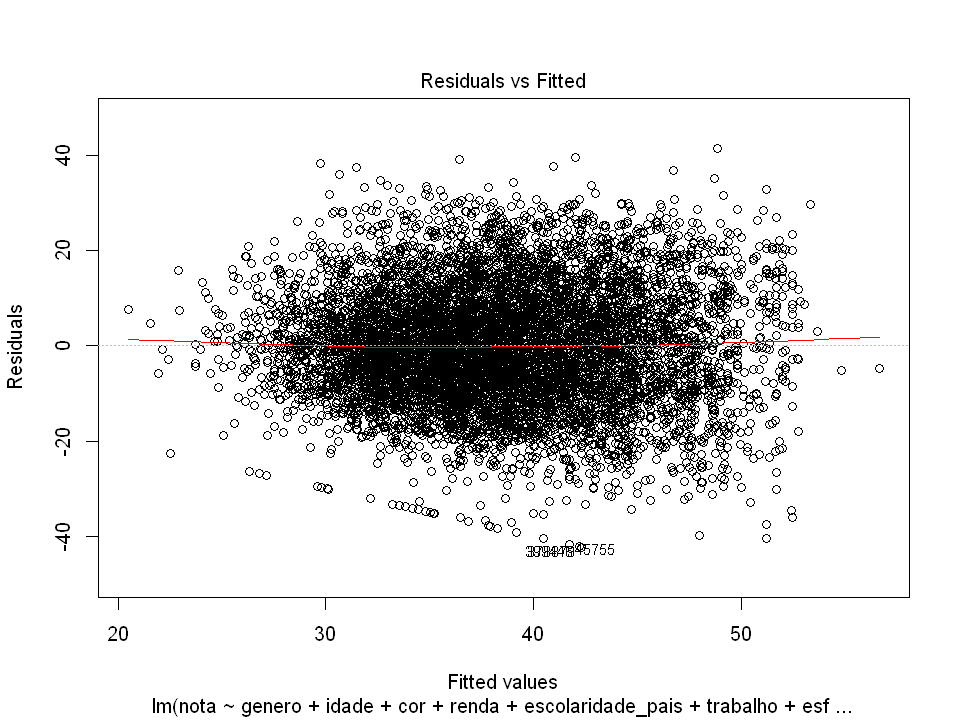

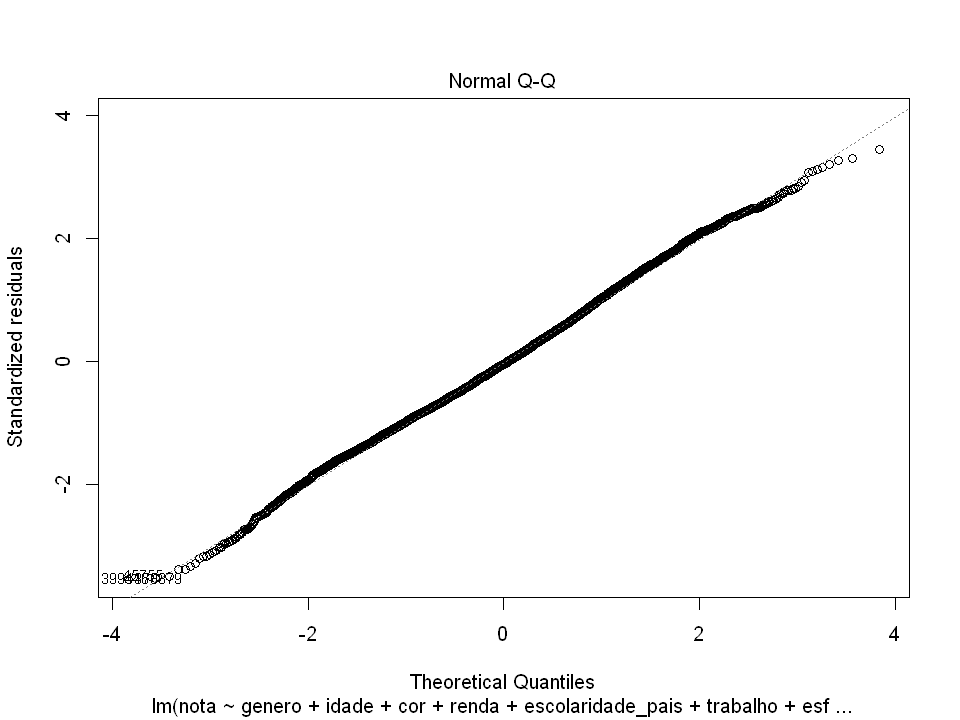

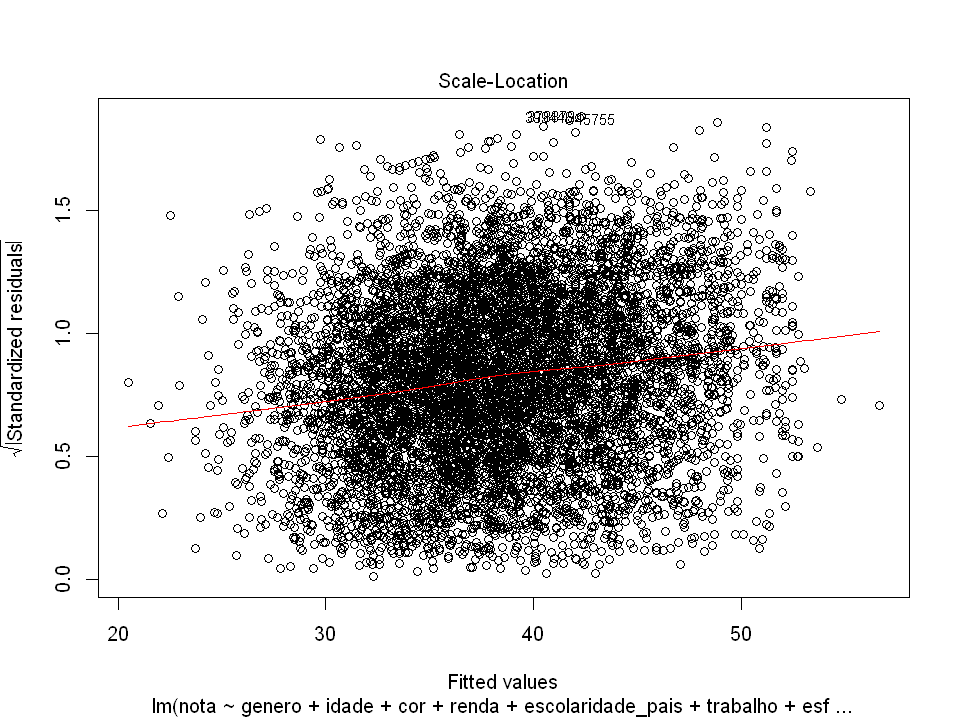

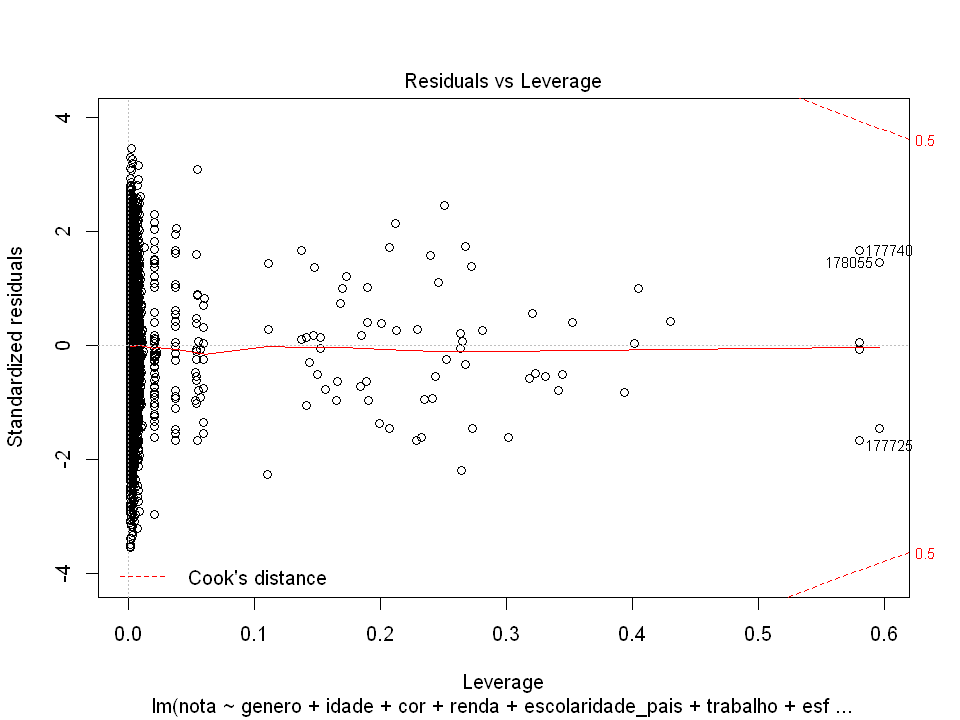

In [246]:
plot(mod_2)